<a href="https://colab.research.google.com/github/gayathrig21/EmotionRecognitionofTweets/blob/main/Emotion_Recognition_of_Tweets_with_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Recognition of Tweets: Natural Language Processing with TensorFlow

## About the dataset

This is a dataset that can be used for emotion classification. It has already been preprocessed based on the approach described in the [paper](https://www.aclweb.org/anthology/D18-1404/). It is also stored as a pandas dataframe and ready to be used in an NLP pipeline.

Note that the version of the data provided here corresponds to a six emotions variant that's meant to be used for educational and research purposes



Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.2 MB/s eta 0:00:00


In [2]:
!pip install datasets 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.3 MB/s eta 0:00:00


In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [5]:
from datasets import load_dataset

dataset = load_dataset('dair-ai/emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train=dataset['train']
val= dataset['validation']
test= dataset['test']

In [8]:
def get_tweet(data):
  tweets =[x['text'] for x in data]
  labels =[x['label'] for x in data]
  return tweets, labels

In [9]:
tweets , labels = get_tweet(train)

In [10]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 0)

## Tokenizer

1. Tokenizing the tweets

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [13]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [14]:
tweets[0]

'i didnt feel humiliated'

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

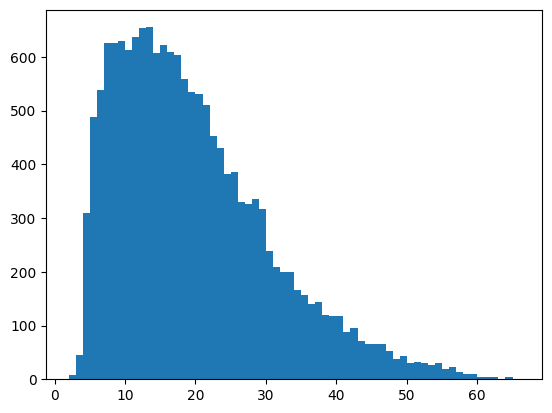

In [15]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [16]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
def get_sequences(tokenizer, tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [18]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [19]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [20]:
classes=set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


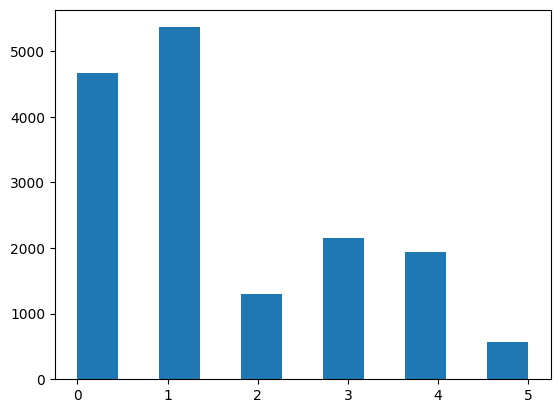

In [21]:
plt.hist(labels, bins=11)
plt.show()

In [22]:
labels[0]

0

In [23]:
train_labels=np.array(labels)

In [24]:
train_labels

array([0, 0, 3, ..., 1, 3, 0])

## Creating the Model

1. Creating the model
2. Compiling the model

In [25]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [27]:
val_tweets, val_labels =get_tweet(val)
val_sequences = get_sequences(tokenizer,val_tweets)
val_labels =np.array(val_labels)

In [28]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [29]:
from keras.callbacks import EarlyStopping
h=model.fit(padded_train_sequences, train_labels
            ,validation_data=(val_sequences,val_labels) ,
           epochs=20, 
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
            )

Epoch 1/20
500/500 [==============================] - 50s 62ms/step - loss: 1.3474 - accuracy: 0.4724 - val_loss: 1.0109 - val_accuracy: 0.6135
Epoch 2/20
500/500 [==============================] - 10s 19ms/step - loss: 0.6881 - accuracy: 0.7469 - val_loss: 0.6159 - val_accuracy: 0.7880
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.4104 - accuracy: 0.8616 - val_loss: 0.5647 - val_accuracy: 0.8210
Epoch 4/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2898 - accuracy: 0.9022 - val_loss: 0.5075 - val_accuracy: 0.8425
Epoch 5/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2098 - accuracy: 0.9339 - val_loss: 0.4556 - val_accuracy: 0.8665
Epoch 6/20
500/500 [==============================] - 12s 25ms/step - loss: 0.1583 - accuracy: 0.9501 - val_loss: 0.4478 - val_accuracy: 0.8740
Epoch 7/20
500/500 [==============================] - 7s 13ms/step - loss: 0.1257 - accuracy: 0.9585 - val_loss: 0.4471 - val_accuracy: 0.

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

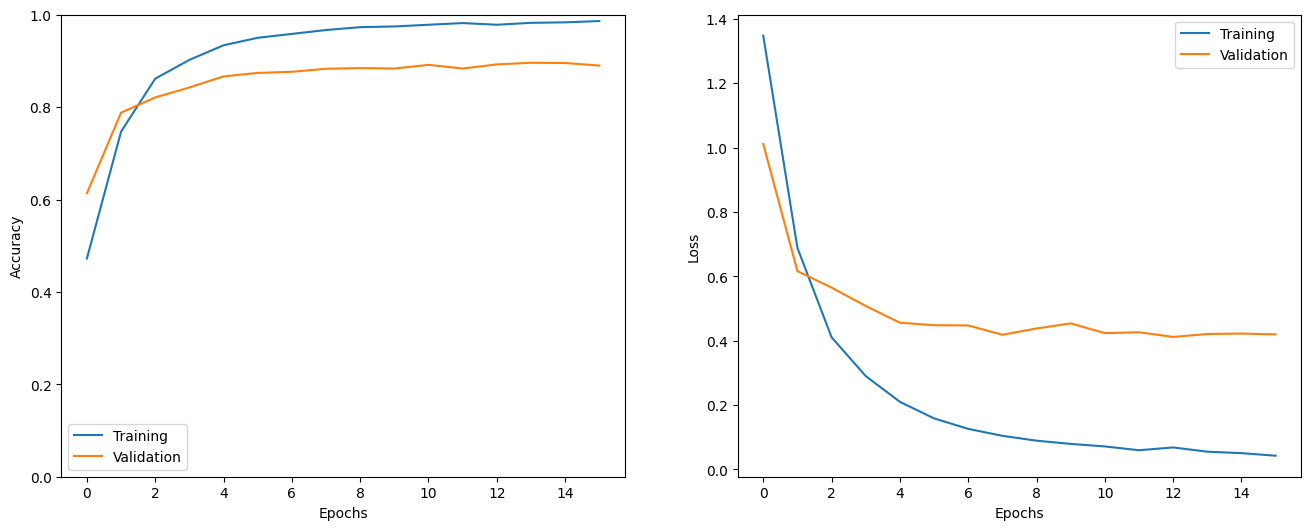

In [30]:
show_history(h)

In [31]:
test_tweets, test_labels =get_tweet(test)
test_sequences = get_sequences(tokenizer,test_tweets)
test_labels =np.array(test_labels)

In [32]:
_=model.evaluate(test_sequences, test_labels)


63/63 [==============================] - 1s 9ms/step - loss: 0.4127 - accuracy: 0.8860


In [33]:
i= random.randint(0, len(test_labels)-1)
print('Sentence', test_tweets[i])
print('Emotion', test_labels[i])

p= model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
pred_class = np.argmax(p).astype('uint8')
print('Predicted Emotion', pred_class)

Sentence i feel like the crows and roosters will be teamed up with the horses and go against the bulls sharks and other monsters that are trying to take over of cool ranch
Emotion 1
1/1 [==============================] - 2s 2s/step
Predicted Emotion 1


In [34]:
pred = np.argmax(model.predict(test_sequences),axis=-1)

63/63 [==============================] - 0s 6ms/step


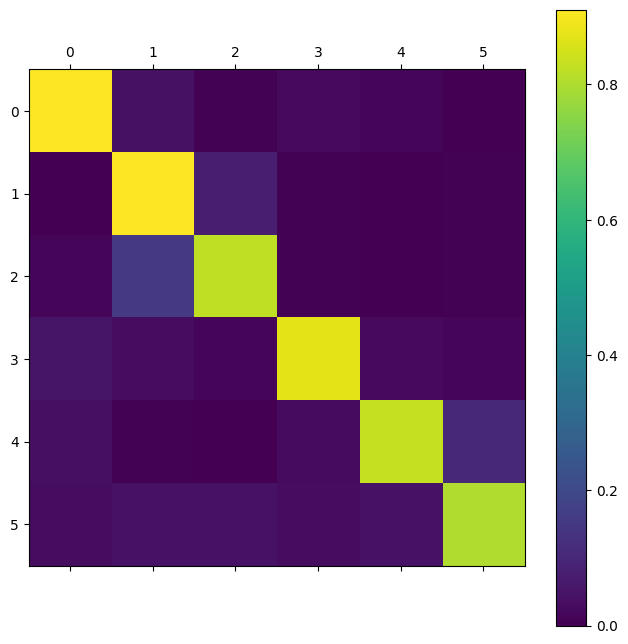

In [35]:
show_confusion_matrix(test_labels, pred, list(classes))